# Trabalho 02 - Aprendizado de Máquina
## Aluno: Ruan Felipe de Almeida Silva - 397048

### Problema:

Sete tipos diferentes de grãos secos foram utilizados nesta pesquisa, levando em consideração as características como forma, formato, tipo e estrutura pela situação de mercado. Um sistema de visão computacional foi desenvolvido para distinguir sete diferentes variedades registradas de feijão seco com características semelhantes, a fim de obter uma classificação uniforme dos grãos. Para o modelo de classificação, imagens de 13.611 grãos de 7 diferentes grãos secos registrados foram tiradas com uma câmera de alta resolução. As imagens de feijão obtidas por sistema de visão computacional foram submetidas às etapas de segmentação e extração de feições, totalizando 16 features; 12 dimensões e 4 formatos de forma, foram obtidas a partir dos grãos. 

Classes: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz e Sira



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Instalação da biblioteca PipelineHelper

In [2]:
!pip install pipelinehelper

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import pipeline

from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn import naive_bayes
from sklearn import linear_model
from sklearn import neighbors
from sklearn import neural_network

from pipelinehelper import PipelineHelper

import warnings
warnings.filterwarnings('ignore')

### Importando os dados do dataset.

In [4]:
dataframe = pd.read_csv('/content/drive/MyDrive/ufc - ec/Aprend_Maquina/datasets/beans.csv')
#dataframe = pd.read_csv('beans.csv')
dataframe

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


### Analisando os tipos de dados do dataset.


In [5]:
dataframe.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

### Verificando se existem dados nulos ou inválidos no dataset.

In [6]:
dataframe.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

### Separando as features das classes e exibindo a quantidade desses conjuntos.

In [7]:
X = dataframe.drop('Class', axis=1)
y = dataframe['Class']
print(X.shape)
print(y.shape)

(13611, 16)
(13611,)


### Exibindo a quantidade de amostras de cada uma das classes de grãos.

In [8]:
y.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

### Exibindo a porcentagem de amostras de cada uma das classes de grãos.

In [9]:
y.value_counts(normalize=True)

DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
Name: Class, dtype: float64

### Separando os conjuntos em 80% para treino e 20% para teste.



In [10]:
X_values = X.values
y_values = y.values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_values, y_values, test_size=0.2, random_state=142, stratify=y)
print("Conjunto x de treino:", X_train.shape[0])
print("Conjunto x de teste:", X_test.shape[0])
print("Conjunto y de treino:", y_train.shape[0])
print("Conjunto y de teste:", y_test.shape[0])

Conjunto x de treino: 10888
Conjunto x de teste: 2723
Conjunto y de treino: 10888
Conjunto y de teste: 2723


### Normalizando os valores das features do conjunto de treino e do conjunto de teste utilizando o MinMaxScaler.

In [11]:
norm = preprocessing.MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

### Plotando o histograma do conjunto de treino sem escalonamento.

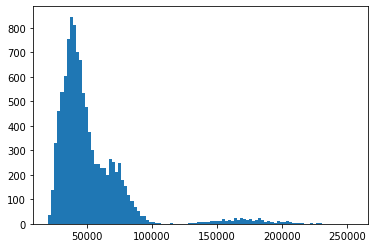

In [12]:
idx = 0
plt.hist(X_train[:, idx], bins=100);

### Plotando o histograma do conjunto de treino normalizado.

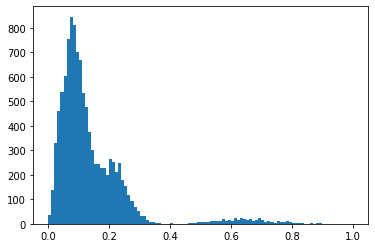

In [13]:
idx = 0
plt.hist(X_train_norm[:, idx], bins=100);

### Padronizando os valores das features do conjunto de treino e do conjunto de teste utilizando o StandardScaler.

In [14]:
std = preprocessing.StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

### Plotando o histograma do conjunto de treino sem escalonamento.

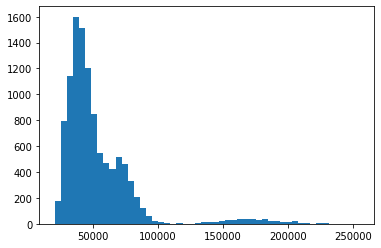

In [15]:
idx = 0
plt.hist(X_train[:, idx], bins=50);

### Plotando o histograma do conjunto de treino padronizado.

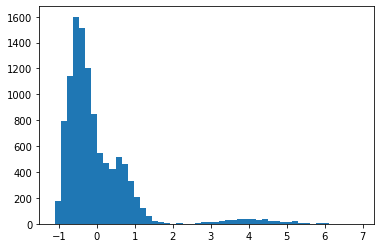

In [16]:
idx = 0
plt.hist(X_train_std[:, idx], bins=50);

### Instanciando modelos de classificadores que serão utilizados abaixo nesse problema de classificação de grãos.

#### Modelos Utilizados: 
* KNeighborsClassifier 
* SVC
* DecisionTreeClassifier
* Naive Bayes
* Random Forest
* Gradient Boosting
* Perceptron
* Multi Layer Perceptron 



In [17]:
knn = neighbors.KNeighborsClassifier()
svc = svm.SVC(random_state = 142)
dt = tree.DecisionTreeClassifier(random_state = 142)
nb = naive_bayes.GaussianNB()
rf = ensemble.RandomForestClassifier(random_state = 142)
gb = ensemble.GradientBoostingClassifier(random_state = 142)
per = linear_model.Perceptron(random_state=142)
mlp = neural_network.MLPClassifier(random_state=142)

### Criando um vetor com os modelos instanciados e outro com as labels de cada modelo.

In [18]:
modelos = [knn, svc, nb, per, mlp, dt, rf, gb]
labels = ['KNN', 'SVC', 'NB', 'PER', 'MLP', 'DT', 'RF', 'GB']

### Realizando o treinamento e o teste para cada modelo, utilizando Pipeline para inserir técnicas de escalonamento para todos os modelos, exceto Decision Tree, Random Forest e Gradient Boosting. As métricas de acurácia e f1-score são analisadas.

In [19]:
std = preprocessing.StandardScaler()
norm = preprocessing.MinMaxScaler()

scalers = ['no scaler', std, norm]
results = []

for model, label in zip(modelos, labels):

  for scaler in scalers:

      s = str(model)
      ind_parenteses = s.find('(')
      name_model = s[:ind_parenteses] 

      if scaler == 'no scaler':
          pipe = pipeline.Pipeline([('estimator', model)])
          scl = 'No Scaler'
      else:
          
          if name_model == 'DecisionTreeClassifier' or  name_model == 'RandomForestClassifier' or name_model == 'GradientBoostingClassifier':
              continue  
          
          pipe = pipeline.Pipeline([('transformer', scaler), ('estimator', model)])
          s = str(scaler)
          ind_parenteses = s.find('(')
          scl = s[:ind_parenteses]
          

      pipe.fit(X_train, y_train)
      y_pred = pipe.predict(X_test)
      
      accuracy = metrics.accuracy_score(y_test, y_pred)
      f1score = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
      
      print(f'Escalonamento: {scl}')
      print(f'Modelo: {name_model}')
      print('Acurácia: {:.5f}'.format(accuracy))
      print('F1-Score: {:.5f}'.format(f1score))        
      print("\n---------------------------------------------------------------------------------\n")

      resultado = {'Model':name_model, 'Label':label, 'Scaler':scl, 'Accuracy':accuracy, 'F1-Score':f1score}
      results.append(resultado)

Escalonamento: No Scaler
Modelo: KNeighborsClassifier
Acurácia: 0.73228
F1-Score: 0.72972

---------------------------------------------------------------------------------

Escalonamento: StandardScaler
Modelo: KNeighborsClassifier
Acurácia: 0.92765
F1-Score: 0.92758

---------------------------------------------------------------------------------

Escalonamento: MinMaxScaler
Modelo: KNeighborsClassifier
Acurácia: 0.92178
F1-Score: 0.92178

---------------------------------------------------------------------------------

Escalonamento: No Scaler
Modelo: SVC
Acurácia: 0.64231
F1-Score: 0.59976

---------------------------------------------------------------------------------

Escalonamento: StandardScaler
Modelo: SVC
Acurácia: 0.93243
F1-Score: 0.93231

---------------------------------------------------------------------------------

Escalonamento: MinMaxScaler
Modelo: SVC
Acurácia: 0.92435
F1-Score: 0.92438

--------------------------------------------------------------------------

### Montando um dataframe com os resultados obtidos pelos modelos e ordenando este dataframe de forma decrescente em relação à coluna F1-Score.

In [20]:
df_results = pd.DataFrame(results)
df_sorted = df_results.sort_values(by='F1-Score', ascending=False)
df_sorted

,Model,Label,Scaler,Accuracy,F1-Score
13,MLPClassifier,MLP,StandardScaler,0.937202,0.937044
4,SVC,SVC,StandardScaler,0.932427,0.932310
1,KNeighborsClassifier,KNN,StandardScaler,0.927653,0.927577
17,GradientBoostingClassifier,GB,No Scaler,0.925450,0.925245
14,MLPClassifier,MLP,MinMaxScaler,0.924715,0.924825
5,SVC,SVC,MinMaxScaler,0.924348,0.924382
16,RandomForestClassifier,RF,No Scaler,0.924348,0.924269
2,KNeighborsClassifier,KNN,MinMaxScaler,0.921777,0.921781
10,Perceptron,PER,StandardScaler,0.899743,0.900228
7,GaussianNB,NB,StandardScaler,0.896805,0.896705


### Realizando a exclusão das linhas cujo escalonador é o MinMaxScaler, para que se possa plotar um gráfico de barras com as demais instâncias.

In [21]:
df_sorted2 = df_sorted.where(df_sorted['Scaler'] != 'MinMaxScaler')
df_plot = df_sorted2.dropna()
df_plot

,Model,Label,Scaler,Accuracy,F1-Score
13,MLPClassifier,MLP,StandardScaler,0.937202,0.937044
4,SVC,SVC,StandardScaler,0.932427,0.932310
1,KNeighborsClassifier,KNN,StandardScaler,0.927653,0.927577
17,GradientBoostingClassifier,GB,No Scaler,0.925450,0.925245
16,RandomForestClassifier,RF,No Scaler,0.924348,0.924269
10,Perceptron,PER,StandardScaler,0.899743,0.900228
7,GaussianNB,NB,StandardScaler,0.896805,0.896705
15,DecisionTreeClassifier,DT,No Scaler,0.896438,0.896347
6,GaussianNB,NB,No Scaler,0.772677,0.769762
0,KNeighborsClassifier,KNN,No Scaler,0.732281,0.729719


### Plotando um gráfico de barras com os valores de acurácia e f1-score dos 8 melhores modelos analisados.

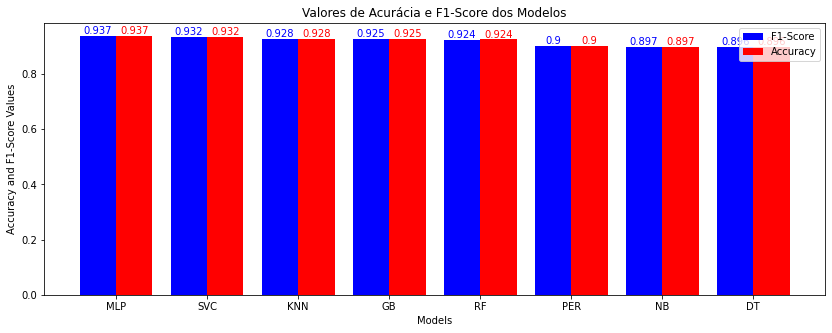

In [22]:
plt.figure(figsize = (14, 5))

barWidth = 0.4

df_plot = df_plot.head(8)

p1 = np.arange(df_plot.shape[0])
p2 = [p + barWidth for p in p1]

plt.bar(p1, df_plot['F1-Score'], color='blue', width=barWidth, label='F1-Score')
plt.bar(p2, df_plot['Accuracy'], color='red', width=barWidth, label='Accuracy')

for value, position in zip(df_plot['F1-Score'], p1):
    plt.annotate(f'{round(value, 3)}', xy=(position, value), va='bottom', ha='center', color='blue')

for value, position in zip(df_plot['Accuracy'], p2):
    plt.annotate(f'{round(value, 3)}', xy=(position, value), va='bottom', ha='center', color='red')

plt.legend()
plt.xlabel('Models')
plt.ylabel('Accuracy and F1-Score Values')
plt.title('Valores de Acurácia e F1-Score dos Modelos')
plt.xticks((p1+p2)/2, df_plot['Label'])
plt.show()

### Função auxiliar que verifica se uma label está na lista de labels.

In [23]:
def isInList(lista, label):
    for el in lista:
        if label == el:
            return True    
    return False

### Instanciando novamente os modelos utilizados.

In [24]:
knn = neighbors.KNeighborsClassifier()
svc = svm.SVC(random_state = 142)
nb = naive_bayes.GaussianNB()
per = linear_model.Perceptron(random_state=142)
mlp = neural_network.MLPClassifier(random_state=142)
dt = tree.DecisionTreeClassifier(random_state = 142)
rf = ensemble.RandomForestClassifier(random_state = 142)
gb = ensemble.GradientBoostingClassifier(random_state = 142)

modelos = [knn, svc, nb, per, mlp, dt, rf, gb]

### Definindo os parâmetros que serão testados no GridSeacrh para cada modelo.

In [25]:
param_knn = {'kneighborsclassifier__n_neighbors': np.arange(1, 16), 
              'kneighborsclassifier__weights':['uniform', 'distance'],
              'kneighborsclassifier__metric':['manhattan', 'minkowski']}
param_svc = {'svc__C': np.logspace(-3, 3, 7),
             'svc__kernel': ['rbf', 'sigmoid'],
             'svc__gamma': ['scale', 'auto'] }
param_nb = {'gaussiannb__var_smoothing': [1e-12, 1e-11, 1e-10, 1e-09, 1e-08]}

param_per = {'perceptron__max_iter': [1000, 1500, 2000],
             'perceptron__tol': np.logspace(-5, 0, 6),
             'perceptron__eta0': [0.5, 0.75, 1]}

param_mlp = {'mlpclassifier__hidden_layer_sizes': [100, 150, 175, 200],
             'mlpclassifier__activation': ['tanh', 'relu']}

param_dt = {'decisiontreeclassifier__max_depth': [3, 4, 5, 6, 8, 10, 12],
            'decisiontreeclassifier__min_samples_leaf': [7, 10, 12, 15, 20]}

param_rf = {'randomforestclassifier__n_estimators': [100, 150, 200],
            'randomforestclassifier__max_depth': [4, 5, 6, 7],
            'randomforestclassifier__min_samples_leaf': [8, 10, 11, 12]}

param_gb = {'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.25, 0.5]}

params_classifiers = [param_knn, param_svc, param_nb, param_per, param_mlp, param_dt, param_rf, param_gb]


### Criando um GridSearch para cada modelo e observando os melhores estimadores e parâmetros para cada classificador, utilizando a métrica f1-score para escolha destes parâmetros.

### Os modelos KNN, SVC, Naive Bayes, Perceptron e Multi Layer Perceptron utilizam o escalonador Standard Scaler. Os demais não usam escalonamento.

In [26]:
std = preprocessing.StandardScaler()

scalers = ['no scaler', std]
grid_results = []

labels_scaler = ['KNN', 'SVC', 'NB', 'PER', 'MLP']
labels_no_scaler = ['DT', 'RF', 'GB']

labels = labels_scaler + labels_no_scaler

for model, params, label in zip(modelos, params_classifiers, labels):
    for scaler in scalers:

        s = str(model)
        ind_parenteses = s.find('(')
        name_model = s[:ind_parenteses]

        if scaler == 'no scaler':

            if isInList(labels_scaler, label):
                continue

            pipe = pipeline.make_pipeline(model)
            scl = 'No Scaler'
        else:

            if isInList(labels_no_scaler, label):
                continue

            pipe = pipeline.make_pipeline(scaler, model)
            s = str(scaler)
            ind_parenteses = s.find('(')
            scl = s[:ind_parenteses]
                 
        gridSearch = model_selection.GridSearchCV(estimator=pipe, param_grid=params, n_jobs=-1, return_train_score=False, scoring='f1_weighted', cv=5)
        gs = gridSearch.fit(X=X_train, y=y_train)
        print(f'Escalonamento: {scl}')
        print(f'Modelo: {name_model}')
        print(f'Melhor F1-Score: {gs.best_score_}')        
        print(f'Melhores parâmetros: {gs.best_params_}')
        print("\n---------------------------------------------------------------------------------\n")
        
        grid_resultado = {'Model':name_model, 'Scaler':scl, 'Label': label, 'Params':gs.best_params_, 'F1-Score':gs.best_score_}
        grid_results.append(grid_resultado)

Escalonamento: StandardScaler
Modelo: KNeighborsClassifier
Melhor F1-Score: 0.9237090990423222
Melhores parâmetros: {'kneighborsclassifier__metric': 'minkowski', 'kneighborsclassifier__n_neighbors': 11, 'kneighborsclassifier__weights': 'distance'}

---------------------------------------------------------------------------------

Escalonamento: StandardScaler
Modelo: SVC
Melhor F1-Score: 0.9297380697072519
Melhores parâmetros: {'svc__C': 10.0, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

---------------------------------------------------------------------------------

Escalonamento: StandardScaler
Modelo: GaussianNB
Melhor F1-Score: 0.896324113635876
Melhores parâmetros: {'gaussiannb__var_smoothing': 1e-12}

---------------------------------------------------------------------------------

Escalonamento: StandardScaler
Modelo: Perceptron
Melhor F1-Score: 0.8954008980002659
Melhores parâmetros: {'perceptron__eta0': 0.75, 'perceptron__max_iter': 1000, 'perceptron__tol': 0.01}

--------

### Montando um dataframe com os resultados dos gridsearches e ordenando decrescentemente pelo valor de F1-Score obtido.

In [27]:
df_grid_results = pd.DataFrame(grid_results)
df_sorted_grid_results = df_grid_results.sort_values(by='F1-Score', ascending=False)
df_sorted_grid_results

,Model,Scaler,Label,Params,F1-Score
4,MLPClassifier,StandardScaler,MLP,"{'mlpclassifier__activation': 'relu', 'mlpclas...",0.932117
1,SVC,StandardScaler,SVC,"{'svc__C': 10.0, 'svc__gamma': 'scale', 'svc__...",0.929738
0,KNeighborsClassifier,StandardScaler,KNN,"{'kneighborsclassifier__metric': 'minkowski', ...",0.923709
7,GradientBoostingClassifier,No Scaler,GB,{'gradientboostingclassifier__learning_rate': ...,0.923150
6,RandomForestClassifier,No Scaler,RF,"{'randomforestclassifier__max_depth': 7, 'rand...",0.909360
5,DecisionTreeClassifier,No Scaler,DT,"{'decisiontreeclassifier__max_depth': 10, 'dec...",0.908913
2,GaussianNB,StandardScaler,NB,{'gaussiannb__var_smoothing': 1e-12},0.896324
3,Perceptron,StandardScaler,PER,"{'perceptron__eta0': 0.75, 'perceptron__max_it...",0.895401


### Definindo um GridSearch com o PipelineHelper para analisar todos os modelos para cada parâmetro analisado e retornar apenas o modelo que apresentar o melhor f1-score. 

In [28]:
pipe = pipeline.Pipeline([
    ('scaler', PipelineHelper([
        ('std', std),
    ])),
    ('classifier', PipelineHelper([
        ('knn', knn),
        ('svc', svc),
        ('nb', nb),
        ('per', per),
        ('mlp', mlp),
        ('dt', dt),
        ('rf', rf),
        ('gb', gb),
    ])),
])

params = {
    'scaler__selected_model': pipe.named_steps['scaler'].generate({
        'std__with_std': [True],
    }),
    'classifier__selected_model': pipe.named_steps['classifier'].generate({
        'knn__n_neighbors': np.arange(1, 16), 
        'knn__weights':['uniform', 'distance'],
        'knn__metric':['manhattan', 'minkowski'],
        'svc__C': np.logspace(-3, 3, 7),
        'svc__kernel': ['rbf', 'sigmoid'],
        'svc__gamma': ['scale', 'auto'],
        'nb__var_smoothing': [1e-12, 1e-11, 1e-10, 1e-09, 1e-08],
        'per__max_iter': [1000, 1500, 2000],
        'per__tol': np.logspace(-5, 0, 6),
        'per__eta0': [0.5, 0.75, 1],
        'mlp__hidden_layer_sizes': [100, 150, 175, 200],
        'mlp__activation': ['tanh', 'relu'],
        'dt__max_depth': [3, 4, 5, 6, 8, 10, 12],
        'dt__min_samples_leaf': [7, 10, 12, 15, 20],
        'rf__n_estimators': [100, 150, 200],
        'rf__max_depth': [4, 5, 6, 7],
        'rf__min_samples_leaf': [8, 10, 11, 12],
        'gb__learning_rate': [0.01, 0.1, 0.25, 0.5]
    })
}
grid = model_selection.GridSearchCV(pipe, params, return_train_score=False, scoring='f1_weighted', cv=5, n_jobs=-1)
gs = grid.fit(X_train, y_train)
print("\n---------------------------------------------------------------------------------\n")
print(gs.best_params_)
print(gs.best_score_)
print("\n---------------------------------------------------------------------------------\n")


---------------------------------------------------------------------------------

{'classifier__selected_model': ('mlp', {'activation': 'relu', 'hidden_layer_sizes': 150}), 'scaler__selected_model': ('std', {'with_std': True})}
0.9321168430536229

---------------------------------------------------------------------------------



### Plotando um gráfico de barras com os valores de f1-score obtidos pelos melhores modelos retornados pelos GridSearches.

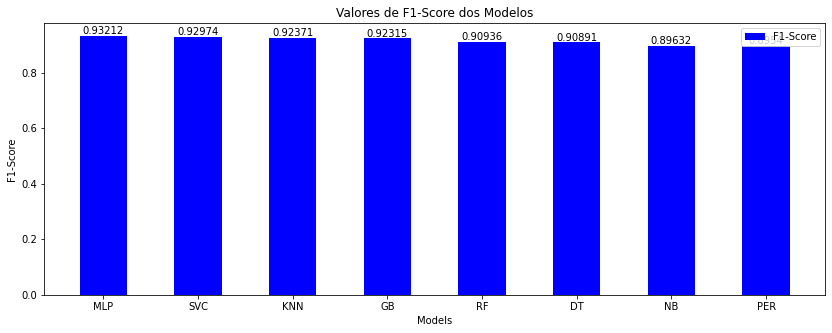

In [29]:
plt.figure(figsize = (14, 5))

barWidth = 0.5

p1 = np.arange(df_sorted_grid_results.shape[0])

plt.bar(p1, df_sorted_grid_results['F1-Score'], color='blue', width=barWidth, label='F1-Score')

for value, position in zip(df_sorted_grid_results['F1-Score'], p1):
    plt.annotate(f'{round(value, 5)}', xy=(position, value), va='bottom', ha='center', color='black')

plt.legend()
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('Valores de F1-Score dos Modelos')
plt.xticks(p1, df_sorted_grid_results['Label'])
plt.show()

### Selecionando os melhores parâmetros do melhor modelo retornado pelo GridSearch.

In [30]:
best_values = df_sorted_grid_results.iloc[0, :]
best_values

Model                                           MLPClassifier
Scaler                                         StandardScaler
Label                                                     MLP
Params      {'mlpclassifier__activation': 'relu', 'mlpclas...
F1-Score                                             0.932117
Name: 4, dtype: object

### Exibindo os melhores parâmetros para o melhor classificador e o escalonador utilizado.

In [31]:
params = best_values.Params
scaler = best_values.Scaler
model = best_values.Model

print(f'Classificador: {model}')
print(f'Parâmetros: {params}')
print(f'Escalonador: {scaler}')

Classificador: MLPClassifier
Parâmetros: {'mlpclassifier__activation': 'relu', 'mlpclassifier__hidden_layer_sizes': 150}
Escalonador: StandardScaler


### Treinando o modelo com os parâmetros selecionados e observando as métricas de acurácia, precisão, recall e f1-score obtidos ao se aplicar os dados do conjunto de teste.

In [32]:
best_model = neural_network.MLPClassifier(activation=params['mlpclassifier__activation'], 
                                          hidden_layer_sizes=params['mlpclassifier__hidden_layer_sizes'])
best_scaler = preprocessing.StandardScaler()

best_pipe = pipeline.Pipeline([('transformer', best_scaler), ('estimator', best_model)])

best_pipe.fit(X_train, y_train)
y_pred = best_pipe.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.95      0.94       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.94      0.96      0.95       326
    DERMASON       0.93      0.94      0.94       709
       HOROZ       0.95      0.94      0.94       386
       SEKER       0.95      0.96      0.95       406
        SIRA       0.91      0.87      0.89       527

    accuracy                           0.94      2723
   macro avg       0.94      0.95      0.94      2723
weighted avg       0.94      0.94      0.94      2723



### Calculando as métricas de acurácia, precisão, recall e f1-score para os dados do conjunto de treino e do conjunto de teste.

In [33]:
y_pred_train = best_pipe.predict(X_train)
y_pred_test = best_pipe.predict(X_test)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

precision_train = metrics.precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
precision_test = metrics.precision_score(y_test, y_pred_test, average='weighted', zero_division=0)

recall_train = metrics.recall_score(y_train, y_pred_train, average='weighted', zero_division=0)
recall_test = metrics.recall_score(y_test, y_pred_test, average='weighted', zero_division=0)

f1score_train = metrics.f1_score(y_train, y_pred_train, average='weighted', zero_division=0)
f1score_test = metrics.f1_score(y_test, y_pred_test, average='weighted', zero_division=0)

scores_train = [accuracy_train, precision_train, recall_train, f1score_train]
scores_test = [accuracy_test, precision_test, recall_test, f1score_test]
scores_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

### Plotando um gráfico de barras com os valores das métricas obtidas com a análise no conjunto de treino e teste realizada no melhor classificador encontrado para esse problema.

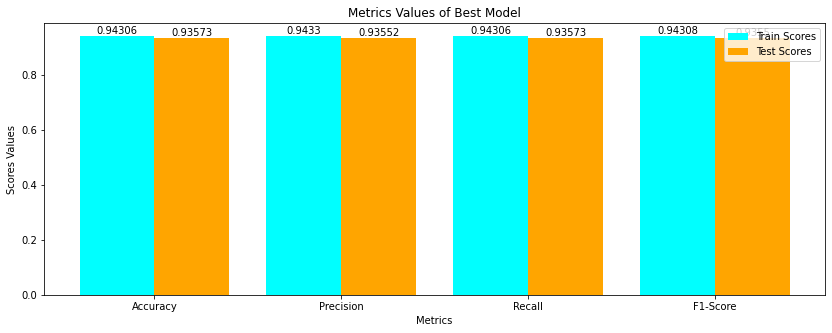

In [34]:
plt.figure(figsize = (14, 5))

barWidth = 0.4

p1 = np.arange(len(scores_train))
p2 = [p + barWidth for p in p1]

plt.bar(p1, scores_train, color='cyan', width=barWidth, label='Train Scores')
plt.bar(p2, scores_test, color='orange', width=barWidth, label='Test Scores')

for value, position in zip(scores_train, p1):
    plt.annotate(f'{round(value, 5)}', xy=(position, value), va='bottom', ha='center', color='black')

for value, position in zip(scores_test, p2):
    plt.annotate(f'{round(value, 5)}', xy=(position, value), va='bottom', ha='center', color='black')

plt.legend()
plt.xlabel('Metrics')
plt.ylabel('Scores Values')
plt.title('Metrics Values of Best Model')
plt.xticks((p1+p2)/2, scores_labels)
plt.show()